In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("data\\sp500.xlsx")
df.head()

,Date,Open,High,Low,Close,Volume
0,03-01-00,1469.250000,1478.000000,1438.359985,1455.219971,931800000
1,04-01-00,1455.219971,1455.219971,1397.430054,1399.420044,1009000000
2,05-01-00,1399.420044,1413.270020,1377.680054,1402.109985,1085500000
3,06-01-00,1402.109985,1411.900024,1392.099976,1403.449951,1092300000
4,07-01-00,1403.449951,1441.469971,1400.729980,1441.469971,1225200000


## 时序的数据预处理

In [3]:
# 日期列转换
df['Date'] = pd.to_datetime(df['Date'])
df.head()

C:\Users\jack\AppData\Local\Temp\ipykernel_28708\773972606.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


,Date,Open,High,Low,Close,Volume
0,2000-03-01,1469.250000,1478.000000,1438.359985,1455.219971,931800000
1,2000-04-01,1455.219971,1455.219971,1397.430054,1399.420044,1009000000
2,2000-05-01,1399.420044,1413.270020,1377.680054,1402.109985,1085500000
3,2000-06-01,1402.109985,1411.900024,1392.099976,1403.449951,1092300000
4,2000-07-01,1403.449951,1441.469971,1400.729980,1441.469971,1225200000


In [4]:
# 时间序列的聚合
df = df.resample(
            rule='M',   # M:按月聚合; W:按周聚合; D:按天聚合
            on='Date').mean() 
df.head()

C:\Users\jack\AppData\Local\Temp\ipykernel_28708\440790038.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df = df.resample(


,Open,High,Low,Close,Volume
Date,,,,,
2000-01-31,1422.309509,1436.489002,1410.382513,1424.124005,1.069355e+09
2000-02-29,1391.677782,1403.917779,1379.257209,1391.433892,1.068028e+09
2000-03-31,1456.239990,1474.273743,1442.749995,1461.503744,1.067104e+09
2000-04-30,1433.221110,1447.548889,1409.087789,1429.893331,1.071120e+09
2000-05-31,1425.875494,1440.216522,1410.833508,1427.122498,9.234650e+08


## 时序的趋势分解

Text(0.5, 1.0, 'residual')

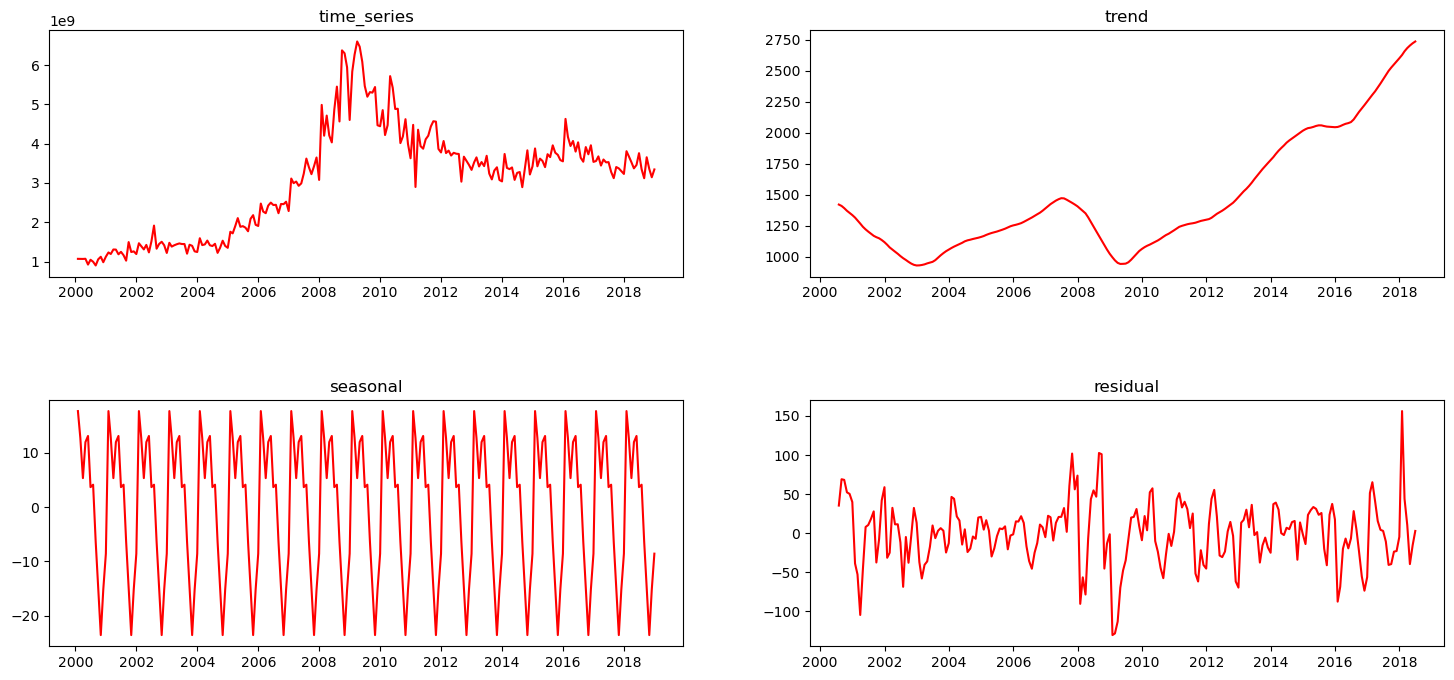

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

result = sm.tsa.seasonal_decompose(df['Open'])

# 绘制原始数据、趋势、季节性和残差
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 8))
fig.subplots_adjust(wspace=0.2, hspace=0.5)               # 同一列元素AX之间距离

ax[0][0].plot(df['Volume'], color='r')
ax[0][0].set_title("time_series")

ax[0][1].plot(result.trend, color='r')
ax[0][1].set_title("trend")

ax[1][0].plot(result.seasonal, color='r')
ax[1][0].set_title("seasonal")

ax[1][1].plot(result.resid, color='r')
ax[1][1].set_title("residual")

## 时序的检验

p值小于0.05才能确定时间序列平稳，否则就需要进行差分，然后再进行检验

In [6]:
from statsmodels.tsa.stattools import adfuller

# ADF检验
result = adfuller(df['Open'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
for key, value in result[4].items():
    print('Critical Values:')
    print(f'   {key}, {value}')

ADF Statistic: 1.6853053564574019
p-value: 0.9980922116495986
Critical Values:
   1%, -3.4594900381360034
Critical Values:
   5%, -2.8743581895178485
Critical Values:
   10%, -2.573601605503697


In [7]:
# 对数据进行一次差分
df = df['Open'].diff().dropna()
df.head()

Date
2000-02-29   -30.631727
2000-03-31    64.562208
2000-04-30   -23.018880
2000-05-31    -7.345616
2000-06-30    27.522333
Freq: ME, Name: Open, dtype: float64